---
# | CASE - Aplicação de Algoritmos de Classificação |
Predição de Doença Cardiaca

---

## Contexto

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro de 5 mortes por DCV são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca.

Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda

---
# Configurações

## Download de Bibliotecas

In [1]:
!pip install pandas
!pip install numpy

!pip install matplotlib
!pip install seaborn
!pip install plotly

!pip install scikit-learn

!pip install xgboost

!pip install graphviz

## Importação de Bibliotecas

In [61]:
# Manipulação de Strings
import re

# Manipulação de Dataframes e Series
import pandas as pd
import numpy as np
import pickle

# Plotagem de Graficos
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import plotly.express as px

# Engenharia de Variaveis
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# Configuração da Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
import joblib

# Prepraração para Treino, Validadação e Otimização do modelo
from sklearn.model_selection import StratifiedKFold # Metodo de validação cruzada
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV # Otimização de Parametros
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

# Modelos
from sklearn.tree import DecisionTreeClassifier # Arvore de Decisão
from sklearn.ensemble import RandomForestClassifier # Random Florest
from xgboost import XGBClassifier # XGBoost

# Auxiliares
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, roc_curve
import graphviz # Plotagem de grafico dos dados das arvores
from sklearn import tree # Dados de arvores
from xgboost import plot_tree # Plotagem de grafico de Random Florest

## Definição de Funções

In [3]:
# Dicionario da Caracteristica 'exerciseAngina'
exerciseAngina_map = {
    'Y' : 1,
    'N' : 0
}

# Transformação de categorico para numerico ordinal
def encode(df):
    df.loc[:,'ExerciseAngina'] = df['ExerciseAngina'].map(exerciseAngina_map)
    return df

In [4]:
def plot_feature_importances(model):
    # Listando features
    n_features = df_coracao[cols_cat+cols_num].shape[1]
    # Gráfico de barras horizontal a partir da importância de cada features
    plt.barh(range(n_features), model.feature_importances_, align='center')
    # Adiciona o ticks, ou traços no eixo Y
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Importancia da Caracteristica")
    plt.ylabel("Caracteristica")
    plt.ylim(-1, n_features)

In [5]:
def plotar_variavelCategorica(variable, df):
    ax = sns.countplot(x=variable, data=df)
    ax.figure.set_size_inches(15,8)
    ax.set_title(f"Quantidade de {variable}", fontsize=20)
    ax.set_xlabel(f"{variable}", fontsize=16)
    ax.set_ylabel("Quantidade", fontsize=16)

In [6]:
def plotar_histplotly(df, variable, color, titulo):
  fig=px.histogram(df,
                 x=variable,
                 color=color,
                 hover_data=df.columns,
                 title=titulo,
                 barmode="group"
                )
  fig.show()

In [7]:
def plotar_boxplot(df, variabley, variablex, titulo): 
  fig = px.box(df,
             y=variabley,
             x=variablex,
             title=titulo)
  fig.show()

In [8]:
def plot_importancia_das_variaveis(model, X, feature_importances):
    df_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    df_importance = df_importance.set_index('Feature')

    ax = df_importance.sort_values(by='Importance', ascending = False).head(10).plot.barh(figsize=(5, 5))
    ax.invert_yaxis()

In [9]:
def plot_curva_ROC(model, X_val, y_val, ax = None):
    roc_auc = roc_auc_score(y_val, model.predict(X_val))
    fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:,1])
    
    if ax is not None:
        ax.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
        ax.plot([0, 1], [0, 1],'r--')
        ax.set_xlabel('Taxa de Falsos Positivos')
        ax.set_ylabel('Taxa de Verdadeiros Positivos')
        ax.legend(loc="lower right")
    else:
        plt.figure()
        plt.plot(fpr, tpr, label='AUC = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlabel('Taxa de Falsos Positivos')
        plt.ylabel('Taxa de Verdadeiros Positivos')
        plt.title('Curva ROC')
        plt.legend(loc="lower right")
        plt.show()

---
# Aquisição & Tratamento

## Aquisição

In [10]:
# Caminho para o dataset
caminho = 'heart.csv'
# Aquisição de dataset e criação de dataframe
df_coracao = pd.read_csv(caminho)

In [11]:
# Informações basicas do dataframe
df_coracao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
# Visualizando dataframe
df_coracao

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [13]:
# Verificação de dados nulos
df_coracao.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [14]:
# Estatisticas gerais dos dados
df_coracao.describe(include='all')

Age  Sex ChestPainType   RestingBP  Cholesterol   FastingBS  \
count   918.000000  918           918  918.000000   918.000000  918.000000   
unique         NaN    2             4         NaN          NaN         NaN   
top            NaN    M           ASY         NaN          NaN         NaN   
freq           NaN  725           496         NaN          NaN         NaN   
mean     53.510893  NaN           NaN  132.396514   198.799564    0.233115   
std       9.432617  NaN           NaN   18.514154   109.384145    0.423046   
min      28.000000  NaN           NaN    0.000000     0.000000    0.000000   
25%      47.000000  NaN           NaN  120.000000   173.250000    0.000000   
50%      54.000000  NaN           NaN  130.000000   223.000000    0.000000   
75%      60.000000  NaN           NaN  140.000000   267.000000    0.000000   
max      77.000000  NaN           NaN  200.000000   603.000000    1.000000   

       RestingECG       MaxHR ExerciseAngina     Oldpeak ST_Slope  \
count         918  918.000000            918  918.000000      918   
unique          3         NaN              2         NaN        3   
top        Normal         NaN              N         NaN     Flat   
freq          552         NaN            547         NaN      460   
mean          NaN  136.809368            NaN    0.887364      NaN   
std           NaN   25.460334            NaN    1.066570      NaN   
min           NaN   60.000000            NaN   -2.600000      NaN   
25%           NaN  120.000000            NaN    0.000000      NaN   
50%           NaN  138.000000            NaN    0.600000      NaN   
75%           NaN  156.000000            NaN    1.500000      NaN   
max           NaN  202.000000            NaN    6.200000      NaN   

        HeartDisease  
count     918.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.553377  
std         0.497414  
min         0.000000  
25%         0.000000  
50%         1.000000  
75%         1.000000  
max         1.000000

## Tratamento

---
# Analise Exploratoria

## Correlação de Dados e Mapa de Calor

In [15]:
df_coracao.corr()

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

<AxesSubplot:>

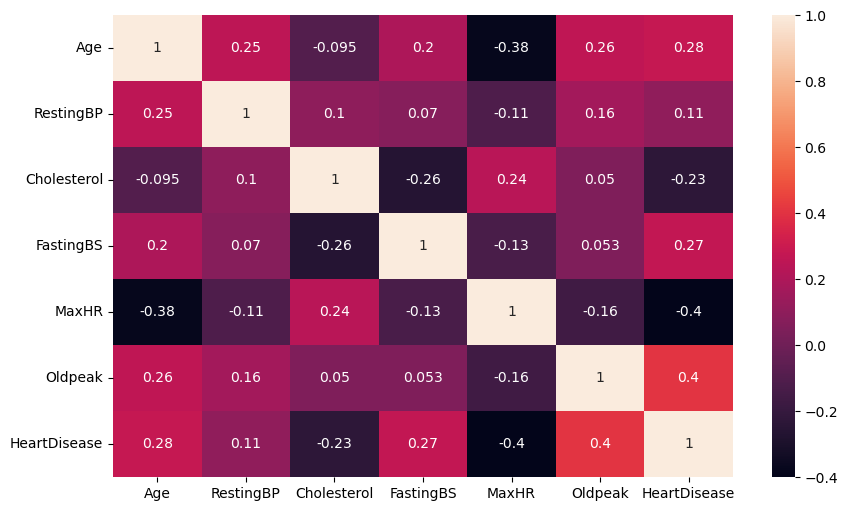

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.heatmap(df_coracao.corr(), ax=ax, annot=True)

## Analise Comparativa entre Sexos

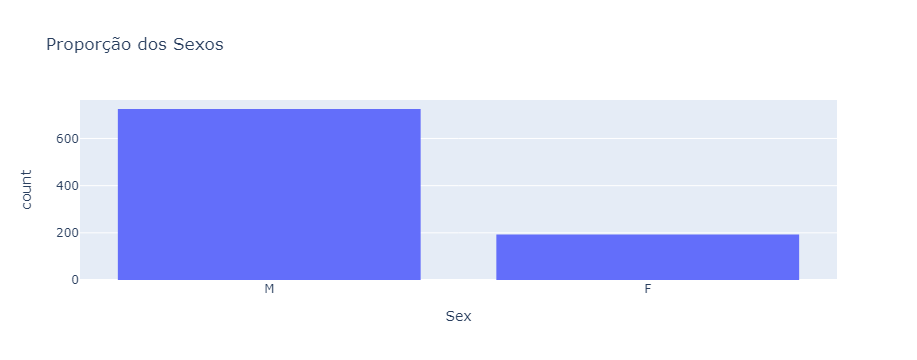

In [17]:
fig=px.histogram(df_coracao,
                 x='Sex',
                 hover_data=df_coracao.columns,
                 title='Proporção dos Sexos',
                 barmode="group"
                )
fig.show()

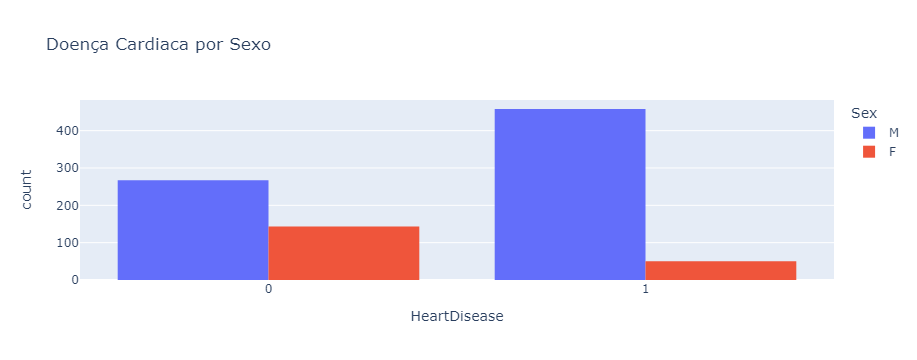

In [18]:
plotar_histplotly(df_coracao, "HeartDisease", "Sex", "Doença Cardiaca por Sexo")

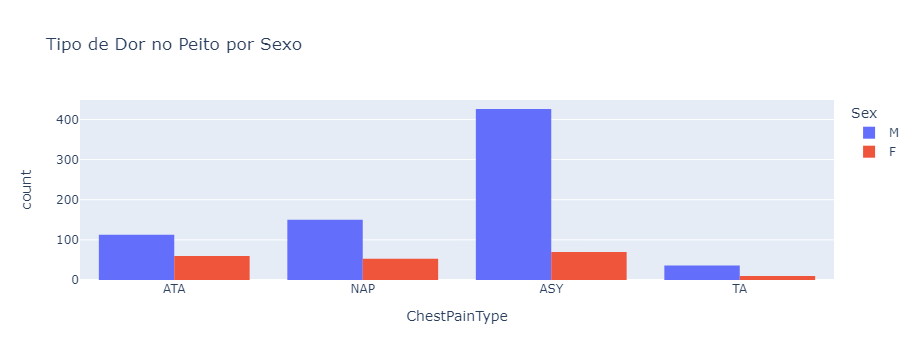

In [19]:
plotar_histplotly(df_coracao, "ChestPainType", "Sex", "Tipo de Dor no Peito por Sexo")

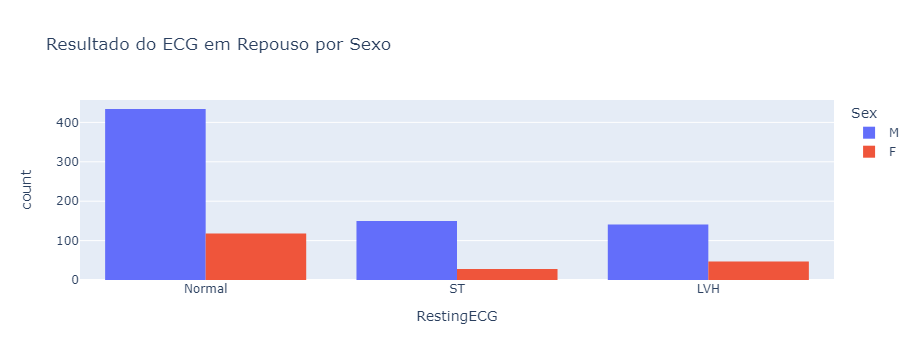

In [20]:
plotar_histplotly(df_coracao, "RestingECG", "Sex", "Resultado do ECG em Repouso por Sexo")

## Insights Gerais

[]

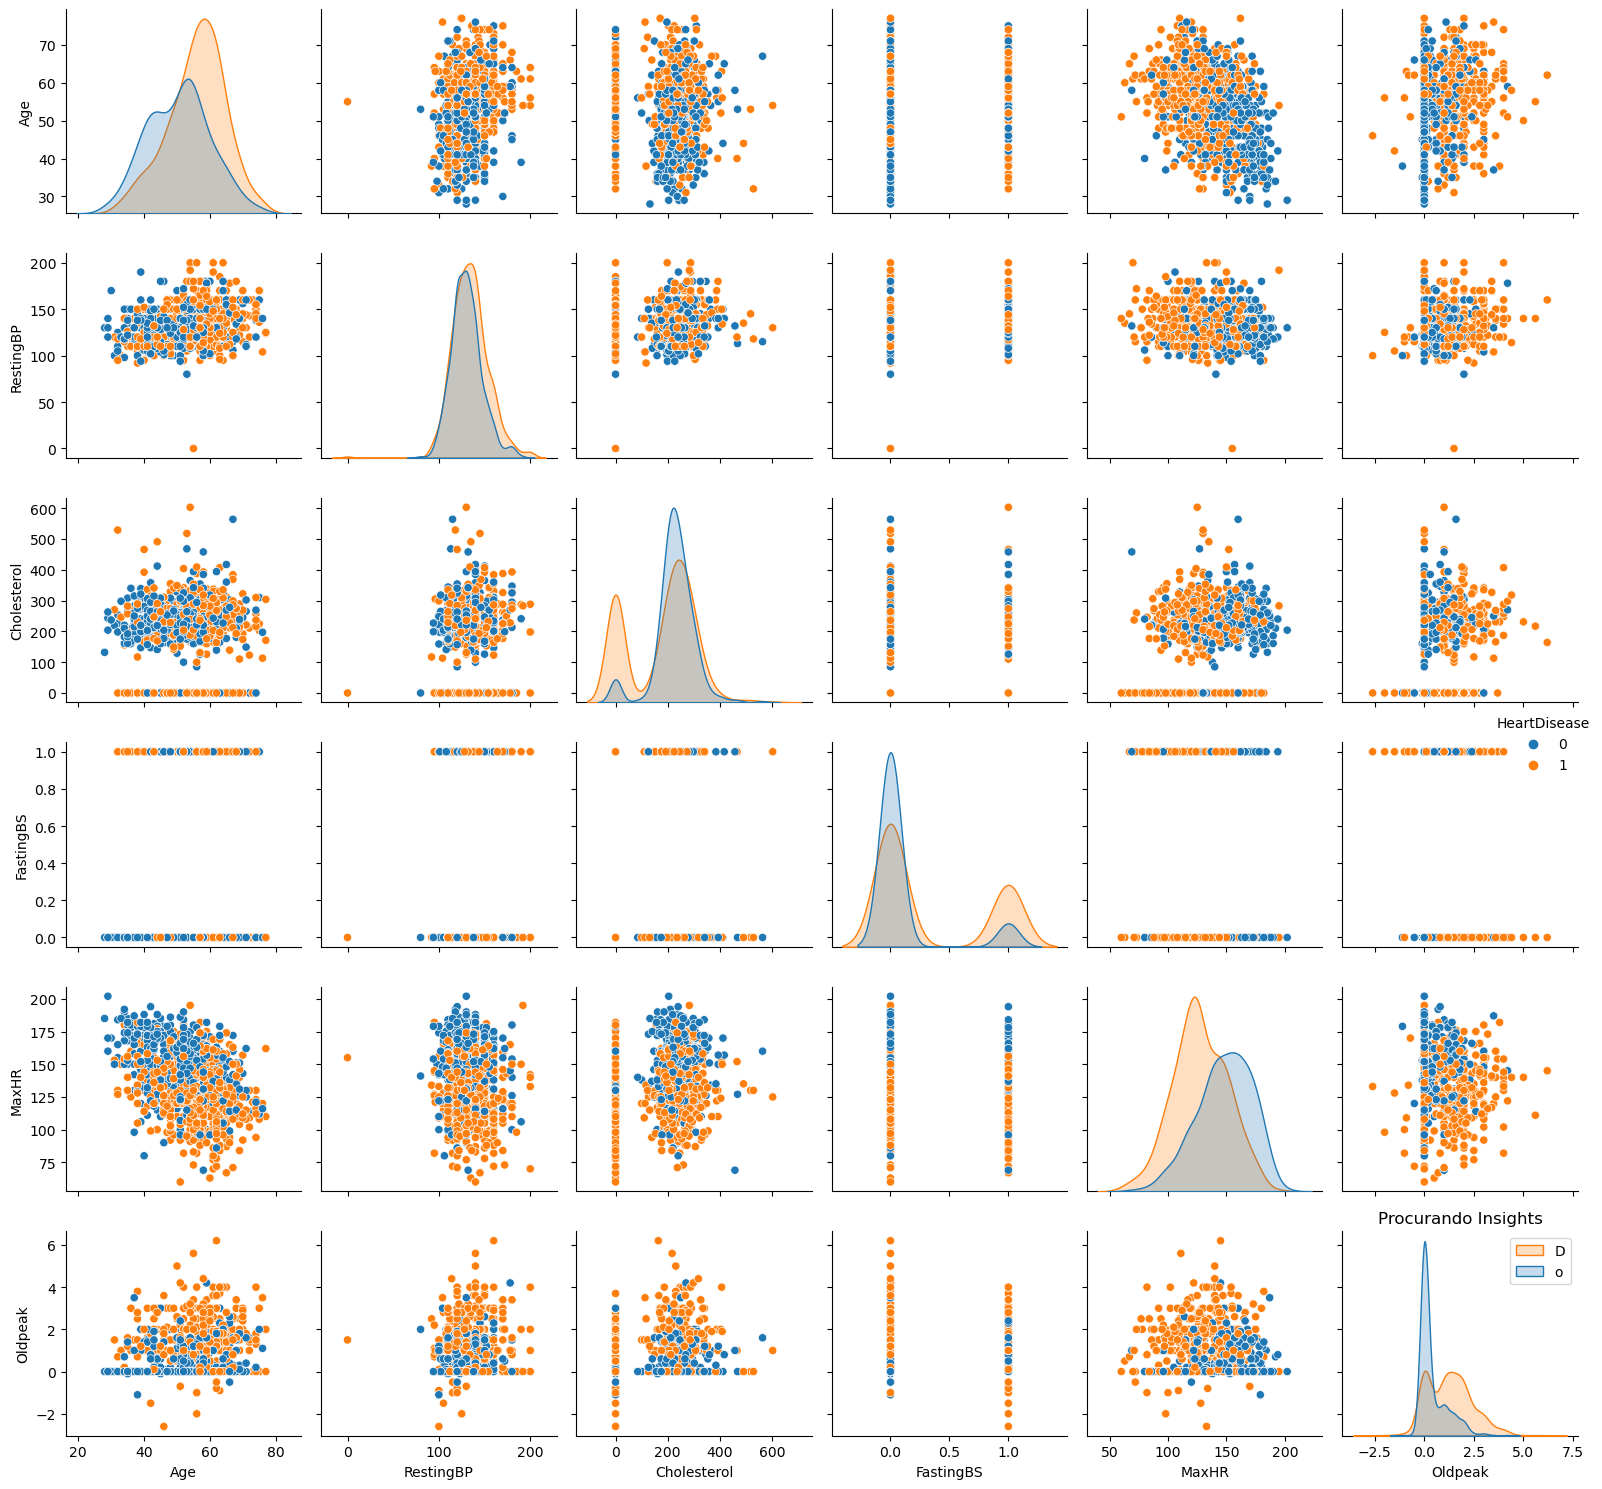

In [21]:
sns.pairplot(df_coracao, hue='HeartDisease')
plt.title("Procurando Insights")
plt.legend("Doença Cardiaca")
plt.tight_layout()
plt.plot()

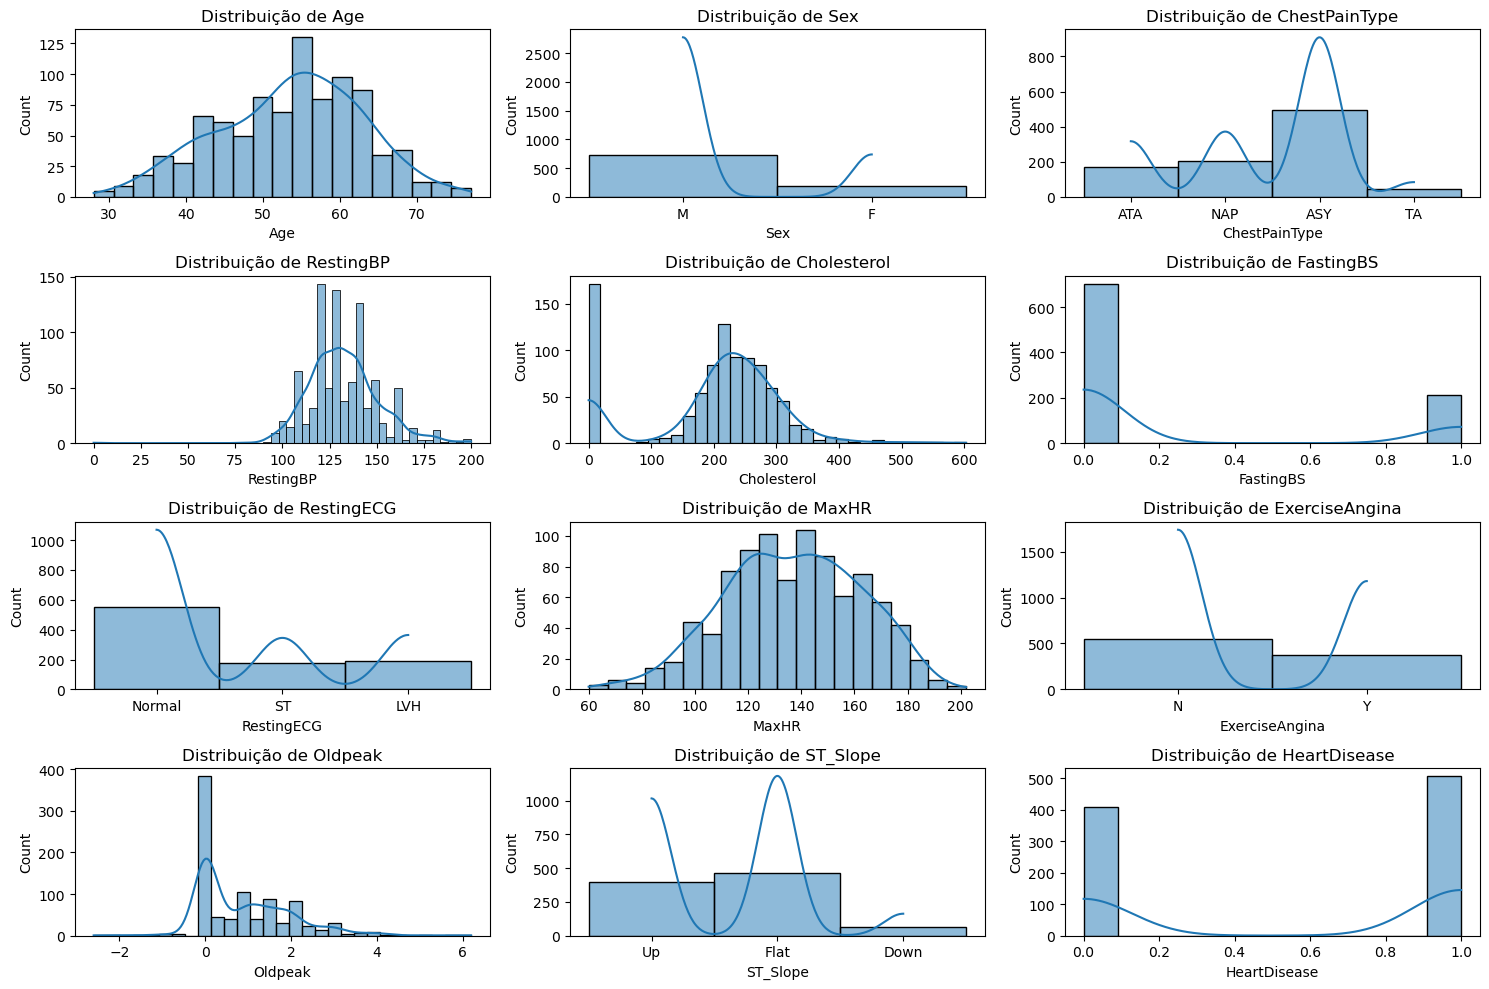

In [22]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df_coracao.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribuição de {col}")
    sns.histplot(df_coracao[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Outliers

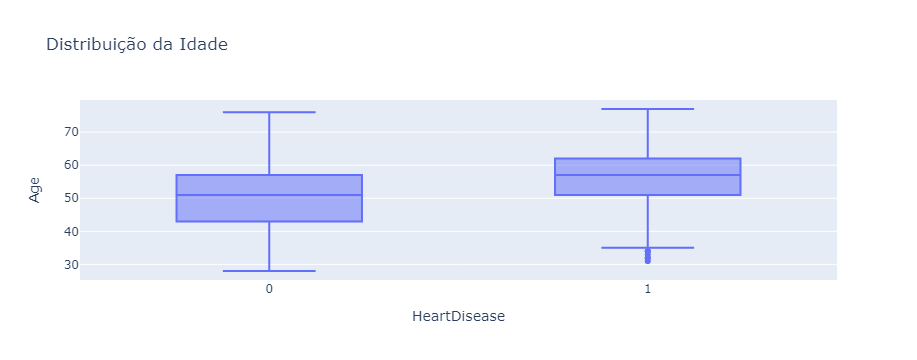

In [23]:
plotar_boxplot(df_coracao, 'Age', 'HeartDisease', "Distribuição da Idade")

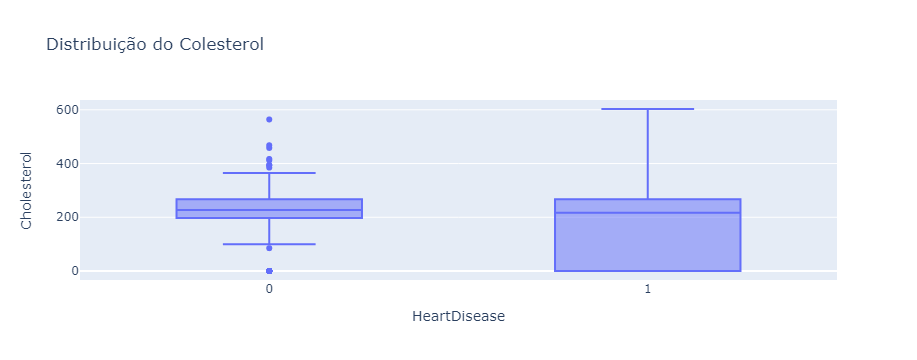

In [24]:
plotar_boxplot(df_coracao, 'Cholesterol', 'HeartDisease', "Distribuição do Colesterol")

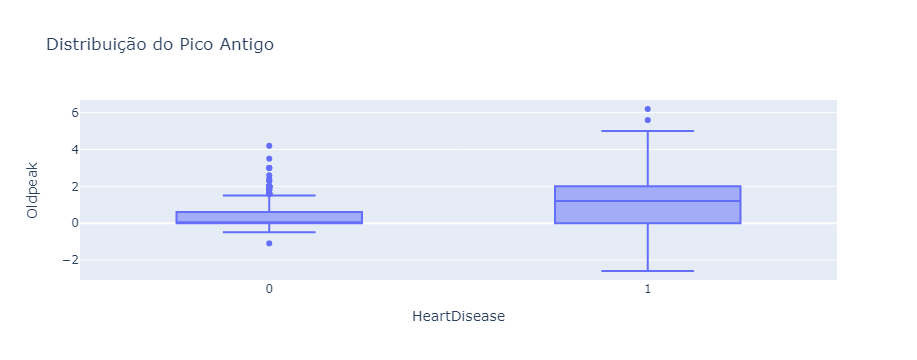

In [25]:
plotar_boxplot(df_coracao, 'Oldpeak', 'HeartDisease', "Distribuição do Pico Antigo")

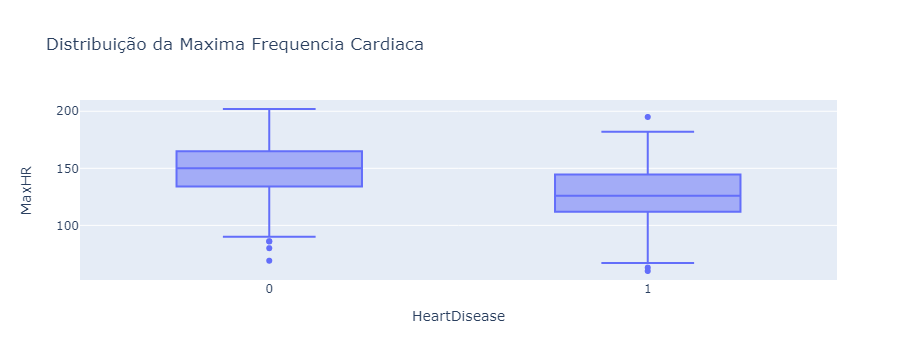

In [26]:
plotar_boxplot(df_coracao, 'MaxHR', 'HeartDisease', "Distribuição da Maxima Frequencia Cardiaca")

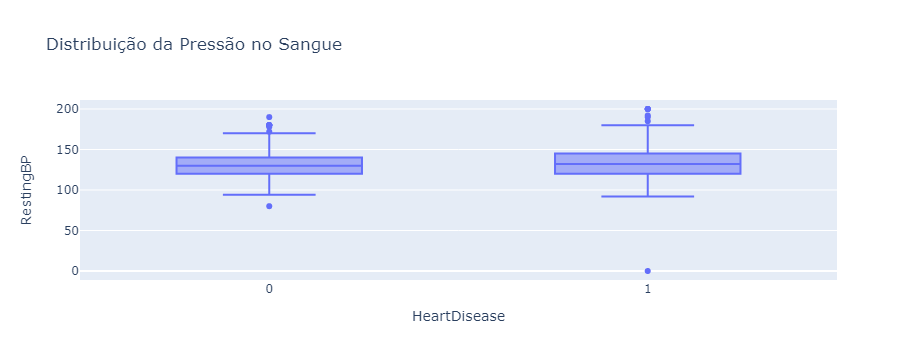

In [27]:
plotar_boxplot(df_coracao, 'RestingBP', 'HeartDisease', "Distribuição da Pressão no Sangue")

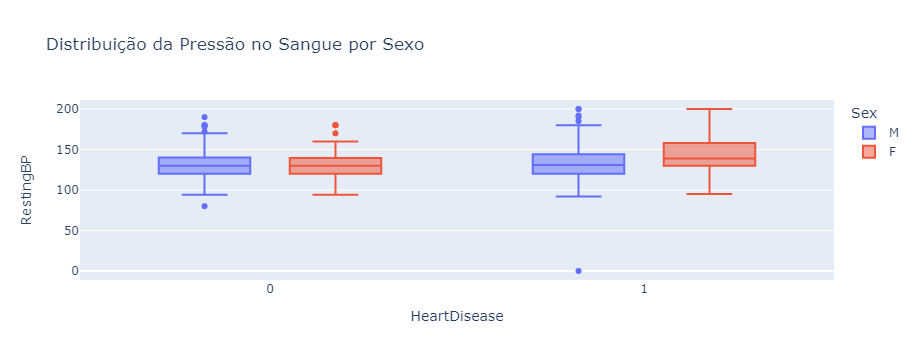

In [28]:
fig = px.box(df_coracao,
             y="RestingBP",
             x="HeartDisease",
             title=f"Distribuição da Pressão no Sangue por Sexo",
             color="Sex")
fig.show()

---
# Engenharia de Variaveis Basica

## Encoding

In [29]:
# Função aplicando transformação
df_coracao = encode(df_coracao)

---
# Pipeline baseada em Arvore de Decisão

## Definição de Classe que Herdará os Modelos Para a Pipeline

In [30]:
class ClfSwitcher(BaseEstimator):

    def __init__(self, estimator = DecisionTreeClassifier()):
        self.estimator = estimator
        
    def fit(self, X, y=None, **kwargs):
        self.estimator.fit(X, y)
        return self
        
    def predict(self, X, y=None):
        return self.estimator.predict(X)
        
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
        
    def score(self, X, y):
        return self.estimator.score(X, y)
    
    @property
    def classes_(self):
        return self.estimator.classes_

## Configuração Inicial da pipeline

In [31]:
# Configurando diagrama de visualização da pipeline
set_config(display='diagram')

In [32]:
seed=10

In [33]:
# Declaração de Colunas que Deverão ser Transformadas de Formas diferentes

# Colunas Numericas
cols_num = ['Age',
           'RestingBP',
           'Cholesterol',
           'FastingBS',
           'MaxHR',
           'Oldpeak',
           'ExerciseAngina']

# Colunas Categoricas
cols_cat = ['Sex',
           'ChestPainType',
           'RestingECG',
           'ST_Slope']

In [34]:
# Definição das caracteristicas de treinamento e dado alvo
X = df_coracao[cols_cat+cols_num]
y = df_coracao['HeartDisease']

# Divisão dos dados para treina e teste
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=seed)

# Divisão dos dados em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X_training, y_training, test_size=0.33, stratify=y_training, random_state=seed)

<img src="https://cdn-images-1.medium.com/max/1200/1*4G__SV580CxFj78o9yUXuQ.png" alt="cv" style="width: 600px;"/>

## Engenharia de Variaveis 

### Definição de Pipeline de Transformação

In [35]:
num_pipeline = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='mean')),
    ('normalizar', MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

### Aplicando Pipeline a Cada Tipo de Coluna

In [36]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,cols_num),
    ('cat_pipeline',cat_pipeline,cols_cat)
    ],
    remainder='drop',
    n_jobs=-1)

## Modelagem

### Definição de Pipeline de Modelagem

In [37]:
clf_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', ClfSwitcher())
])

## Visualizando Parametros e Forma da Pipeline

In [38]:
display(clf_pipeline)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputar',
                                                                   SimpleImputer()),
                                                                  ('normalizar',
                                                                   MinMaxScaler())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak',
                                                   'ExerciseAngina']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputar',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ST_Slope'])])),
                ('model', ClfSwitcher())])

In [39]:
clf_pipeline.get_params()

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('imputar', SimpleImputer()),
                                                    ('normalizar',
                                                     MinMaxScaler())]),
                                    ['Age', 'RestingBP', 'Cholesterol',
                                     'FastingBS', 'MaxHR', 'Oldpeak',
                                     'ExerciseAngina']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('imputar',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
     

## Metodologia de Avaliação

In [40]:
met_score = "roc_auc"

## Parametros

In [41]:
# Parametros para DecisionTree
grid_DCT_params = {'model__estimator':[DecisionTreeClassifier(random_state=seed)],
                   'col_trans__num_pipeline__normalizar': [MinMaxScaler(), None],
                   'model__estimator__max_depth': [4, 6, 7],
                   'model__estimator__min_samples_split': [2, 3, 4],
                   'model__estimator__min_samples_leaf': [1, 2, 3],}

# Parametros para RandomFlorest
grid_RFC_params = {'model__estimator':[RandomForestClassifier(random_state=seed)],
                   'col_trans__num_pipeline__normalizar': [MinMaxScaler(), None],
                   'model__estimator__n_estimators': [5, 20, 50, 100],
                   'model__estimator__min_samples_split': [2, 6, 10],
                   'model__estimator__min_samples_leaf': [1, 3, 4],
                   'model__estimator__bootstrap': [True, False]}

# Parametros para XGBoost
grid_XGB_params = {'model__estimator':[XGBClassifier(objective="binary:logistic",
                                                     random_state=seed,
                                                     eval_metric='auc',
                                                     n_estimators=10,
                                                     use_label_encoder=False)],
                   'col_trans__num_pipeline__normalizar': [MinMaxScaler(), None],
                   'model__estimator__learning_rate': [0.1, 0.2, 0.3],
                   'model__estimator__alpha': [5, 10, 15],
                   'model__estimator__colsample_bytree': [0.1, 0.3, 0.5, 0.7],
                   'model__estimator__max_depth': [3, 4, 5]}

grid_models = [grid_DCT_params, grid_RFC_params, grid_XGB_params] 

## Validação Cruzada

In [42]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

<img src="https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2015/11/skfold.png" alt="stratifiedkfold" style="width: 600px;"/>

## GridSearchCV

In [43]:
# Instanciando GridSearchCV e apliando à pipeline afim de achar os melhores parametros
gs = GridSearchCV(clf_pipeline,
                  grid_models,
                  scoring=met_score,
                  cv=skf.split(X_training, y_training))
# Testando os conjuntos de parametos na modelagem
gs.fit(X_training, y_training)

# Resultados
print("Melhor "+met_score+" de treino apresentado: "+str(gs.best_score_))
print("Melhor conjunto de parametros: "+str(gs.best_params_))

Melhor roc_auc de treino apresentado: 0.9293747625638298
Melhor conjunto de parametros: {'col_trans__num_pipeline__normalizar': None, 'model__estimator': RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       random_state=10), 'model__estimator__bootstrap': True, 'model__estimator__min_samples_leaf': 4, 'model__estimator__min_samples_split': 10, 'model__estimator__n_estimators': 100}


In [44]:
cv_results = pd.DataFrame(gs.cv_results_)

In [45]:
print(met_score+" médio(a) no conjunto de validação: {:.3f} +/- {:.3f}".format(
  cv_results[cv_results.rank_test_score == 1].mean_test_score.values[0],
  cv_results[cv_results.rank_test_score == 1].std_test_score.values[0])
)

roc_auc médio(a) no conjunto de validação: 0.929 +/- 0.020


In [46]:
# Visualizando tabela com resultados do RandomizedSearchCV
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.855436      1.132972         0.516394        0.623875   
1         0.012691      0.000994         0.008176        0.000380   
2         0.010864      0.005742         0.008323        0.007074   
3         0.013075      0.006626         0.009366        0.007648   
4         0.012712      0.006371         0.008040        0.006993   
..             ...           ...              ...             ...   
409       0.047669      0.003864         0.021273        0.006035   
410       0.048366      0.002934         0.021631        0.007527   
411       0.042565      0.007833         0.024994        0.007653   
412       0.046653      0.008401         0.021063        0.008476   
413       0.047380      0.004736         0.023732        0.007012   

    param_col_trans__num_pipeline__normalizar  \
0                              MinMaxScaler()   
1                              MinMaxScaler()   
2                              MinMaxScaler()   
3                              MinMaxScaler()   
4                              MinMaxScaler()   
..                                        ...   
409                                      None   
410                                      None   
411                                      None   
412                                      None   
413                                      None   

                                param_model__estimator  \
0              DecisionTreeClassifier(random_state=10)   
1              DecisionTreeClassifier(random_state=10)   
2              DecisionTreeClassifier(random_state=10)   
3              DecisionTreeClassifier(random_state=10)   
4              DecisionTreeClassifier(random_state=10)   
..                                                 ...   
409  XGBClassifier(base_score=None, booster=None, c...   
410  XGBClassifier(base_score=None, booster=None, c...   
411  XGBClassifier(base_score=None, booster=None, c...   
412  XGBClassifier(base_score=None, booster=None, c...   
413  XGBClassifier(base_score=None, booster=None, c...   

    param_model__estimator__max_depth  \
0                                   4   
1                                   4   
2                                   4   
3                                   4   
4                                   4   
..                                ...   
409                                 4   
410                                 5   
411                                 3   
412                                 4   
413                                 5   

    param_model__estimator__min_samples_leaf  \
0                                          1   
1                                          1   
2                                          1   
3                                          2   
4                                          2   
..                                       ...   
409                                      NaN   
410                                      NaN   
411                                      NaN   
412                                      NaN   
413                                      NaN   

    param_model__estimator__min_samples_split  \
0                                           2   
1                                           3   
2                                           4   
3                                           2   
4                                           3   
..                                        ...   
409                                       NaN   
410                                       NaN   
411                                       NaN   
412                                       NaN   
413                                       NaN   

    param_model__estimator__bootstrap  ...  \
0                                 NaN  ...   
1                                 NaN  ...   
2                                 NaN  ...   
3                                 NaN  ...   
4

## Pipeline Final

### Setando Pametros

In [47]:
#preprocessamento = gs.best_params_['col_trans__num_pipeline__normalizar']
#modelo = gs.best_params_['model__estimator']
#pipeline_final = clf_pipeline.set_params(col_trans__num_pipeline__normalizar = preprocessamento,
                        #model__estimator = modelo)

In [48]:
modelo = RandomForestClassifier(random_state=seed,
                                      bootstrap=True,
                                      min_samples_leaf=4,
                                      min_samples_split=10,
                                      n_estimators=100)

In [49]:
modelo_utilizado = str(gs.best_params_['model__estimator'])
modelo_utilizado = str(re.findall('.*[a-z]\(', modelo_utilizado))
modelo_utilizado = modelo_utilizado.replace("['",'')
modelo_utilizado = modelo_utilizado.replace("']",'')
modelo_utilizado = modelo_utilizado.replace("(",'')
modelo_utilizado

'RandomForestClassifier'

### Pipeline

In [50]:
num_pipeline_final = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='mean')),
])

cat_pipeline_final = Pipeline(steps=[
    ('imputar', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))
])

In [51]:
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline_final,cols_num),
    ('cat_pipeline',cat_pipeline_final,cols_cat)
    ],
    remainder='drop',
    n_jobs=-1)

In [52]:
pipeline_final = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', modelo)
])

### Treino e Visualização

In [53]:
# Passa dados de treino atraves da pipeline de modelagem
pipeline_final.fit(X_train, y_train)

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('imputar',
                                                                   SimpleImputer())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak',
                                                   'ExerciseAngina']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('imputar',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ST_Slope'])])),
                ('model',
                 RandomForestClassifier(min_samples_leaf=4,
                                        min_samples_split=10,
                                        random_state=10))])

### Previsão de Conjunto Validação

In [54]:
y_val_pred = pipeline_final.predict(X_val)
y_val_proba = pipeline_final.predict_proba(X_val)

### Validação do Modelo

#### Importancia das Caracteristicas

In [55]:
#try:
    #XGBClassifier.plot_importance(pipeline_final)
    #plt.show()
#except:
    #try:
        #plot_feature_importances(pipeline_final['model'])
    #except:
        #plot_feature_importances(pipeline_final)

#### Curva ROC, Score e mais

<img src=https://cdn-images-1.medium.com/max/1200/1*uR09zTlPgIj5PvMYJZScVg.png width=500/>

In [56]:
# Avaliando score de previsão dos dados de teste
try:
    print("Acuracia no conjunto de treino: {:.3f}".format(pipeline_final.score(X_train, y_train)))
    print("Acuracia no conjunto de validação: {:.3f}".format(pipeline_final.score(X_val, y_val_pred)))
    print(classification_report(y_val, y_val_pred))
    print(confusion_matrix(y_val, y_val_pred))
    print("Área sob a curva ROC: {:.3f}".format(roc_auc_score(y_val, y_val_pred)))
except:
    print("Erro")

Acuracia no conjunto de treino: 0.911
Acuracia no conjunto de validação: 1.000
              precision    recall  f1-score   support

           0       0.92      0.80      0.86       102
           1       0.86      0.94      0.90       126

    accuracy                           0.88       228
   macro avg       0.89      0.87      0.88       228
weighted avg       0.89      0.88      0.88       228

[[ 82  20]
 [  7 119]]
Área sob a curva ROC: 0.874


#### Grafico da Curva ROC

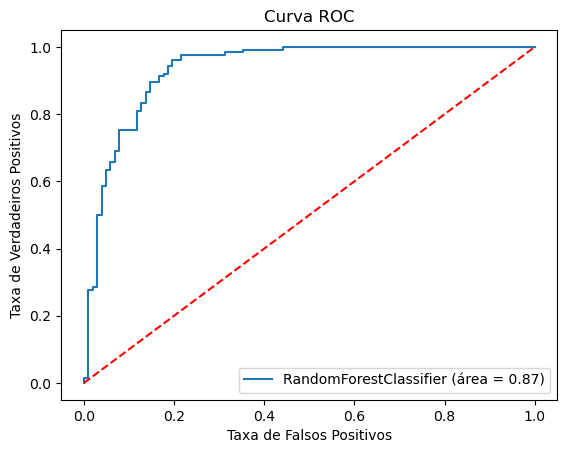

In [57]:
pipeline_roc_auc = roc_auc_score(y_val, y_val_pred)
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label=modelo_utilizado+" (área = %0.2f)" % pipeline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

### Teste

In [58]:
# Previsão no dataset de teste
y_test_pred = pipeline_final.predict(X_test)

# Printar o score 
score = pipeline_final.score(X_test, y_test)
    
print('Acuracia do modelo: {:.3f}'.format(score))    

# Printar a precisão do algoritmo
print('Precisão do algoritmo: {:.3f}'.format(precision_score(y_test, y_test_pred)))

Acuracia do modelo: 0.887
Precisão do algoritmo: 0.885


## Salvar Pipeline

In [71]:
# Para salvar uma pipeline usando joblib
joblib.dump(pipeline_final, "model.joblib")

# Para carregar uma pipeline ja armazenada
# pipe = joblib.load("pipe.joblib")

['model.joblib']